In [2]:
import numpy as np
import pandas as pd

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

**[참고] 데이터프레임 출력 제한 설정**

- 노트북은 데이터프레임이 60행을 넘기면 위 아래 5행씩 10행만 출력하고 중간을 생략함
- 열은 20열을 넘기면 좌우 10열씩 20열만 출력하고 중간을 생략함

In [5]:
pd.get_option('display.max_rows', None)
pd.get_option('display.max_columns')

60

20

In [11]:
# pd.set_option('display.max_rows', 20)
# pd.set_option('display.max_columns', 10)
# pd.set_option('display.max_rows', None) # 모든 행 출력
# pd.set_option('display.max_columns', None) # 모든 열 출력
# pd.set_option('display.max_rows') # 모든 행 출력
# pd.set_option('display.max_columns') # 모든 열 출력
# pd.reset_option('all')
# pd.get_option('display.max_rows')
# pd.get_option('display.max_columns')

In [9]:
# pd.read_csv('data/house/나주시_주택현황 및 보급률(2004~2020).csv', encoding='euckr')

## **데이터의 그룹별 분석**

### 1. 그룹별 분석(group analysis)이란?

- 그룹별로 데이터를 요약 : 그룹별 집계, 변형, 필터 등
- pandas에서는 **groupby()** 함수를 통해서 데이터를 그룹화
- 그룹별 분석은 먼저 그룹별로 동일한 연산을 적용하고 그 결과 얻어진 그룹별 연산 결과를 다시 결합하야 반환함

### 2. 그룹별 분석을 위한 **분할-적용-결합** 패턴

- 분할(SPLIT) : 어떤 기준에 따라 데이터셋을 작은 조각으로 분할한다
- 적용(APPLY) : 각 조각에 대해 독립적으로 연산을 수행한다
- 결합(COMBINE) : 모든 결과를 다시 하나의 단위로 조합한다

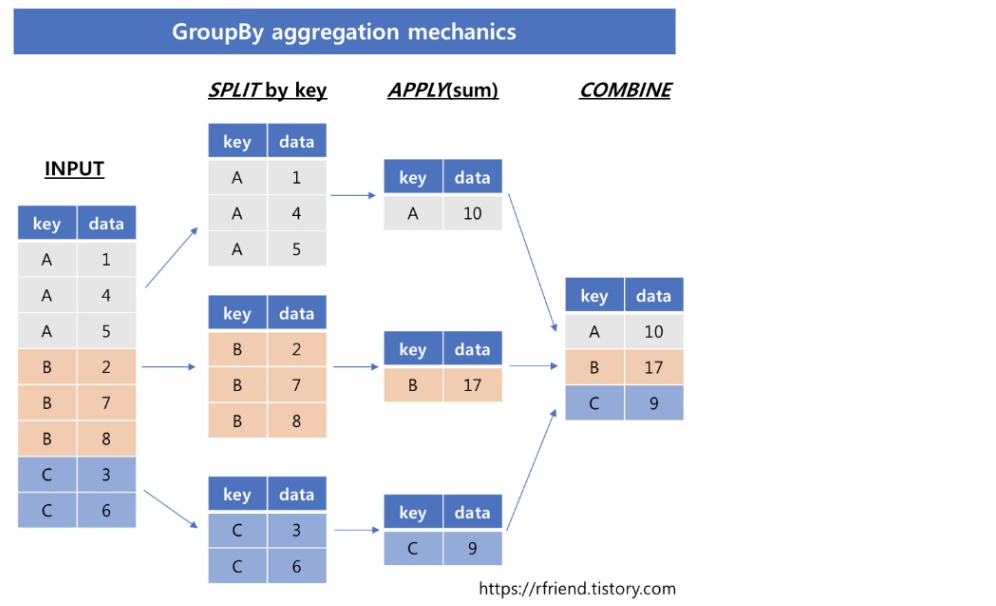

① 데이터 **분할(split)** 작업

- 시리즈나 데이터프레임의 **groupby() 메소드**를 사용하여 그룹화
- 하나 이상의 인덱스 레이블이나 컬럼명에 기초하여 연관된 값들을 그룹화함

② 데이터 분할 후 각 그룹에 **적용(apply)** 되는 작업

- 집계(aggregation) : 각 그룹의 아이템에 대한 평균이나 개수 등 통계량 계산
- 변형(transform) : 그룹이나 아이템에 특정적인 계산을 수행
- 필터링(filtering) : 그룹 단위의 계산에 기초해 불필요한 데이터 그룹 제거

③ 각 그룹에 적용된 결과를 **결합(combine)** 하는 작업

### 3. **`groupby()`** 메서드
- groupby() 메서드를 사용하여
    1. 분석하고자 하는 시리즈나 데이터프레임에 **groupby() 메서드**를 호출하여 그룹화 수행
    2. 그룹 객체에 대해 그룹연산을 수행
- 형식
    - groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, dropna=True,...)    
        - by : 열인덱스 또는 행인덱스(mapping, function, label, or list of labels)
        - axis : 0 or 'index', 1 or 'columns' (default 0)
- 연산 결과
    - 그룹 데이터를 나타내는 **GroupBy클래스 객체 반환**
    - GroupBy클래스 객체는 `그룹 이름`과 그에 따른 `데이터 묶음`을 `튜플 형식`으로 반환함
    - 이 객체에는 그룹별로 연산을 할 수 있는 **그룹연산 메서드** 가 있음   

#### GroupBy클래스 객체의 그룹 연산 메소드들

|메소드|기능|
|---|---|
|**size, count**|그룹 데이터의 갯수|
|**mean, median, min, max**|그룹 데이터의 평균, 중앙값, 최소, 최대}
|**sum, prod, std, var, quantile**|그룹 데이터의 합계, 곱, 표준편차, 분산, 사분위수|
|**first, last**|그룹 데이터 중 가장 첫번째 데이터와 가장 나중 데이터|
|**describe**|하나의 그룹 대표값이 아니라 여러 개의 값을 데이터프레임으로 구함|
|**agg, aggregate**|- 그룹연산을 위한 함수 지정<br>- 만약 원하는 그룹연산이 없는 경우 함수를 만들고 이 함수를 agg에 전달<br>- 또는 여러가지 그룹연산을 동시에 하고 싶은 경우 함수 이름 문자열의 리스트를 전달|
|**apply**|describe 처럼 하나의 대표값이 아닌 데이터프레임을 출력하지만 원하는 그룹연산이 없는 경우에 사용|
|**transform**|그룹에 대한 대표값을 만드는 것이 아니라 그룹별 계산을 통해 데이터 자체를 변형|

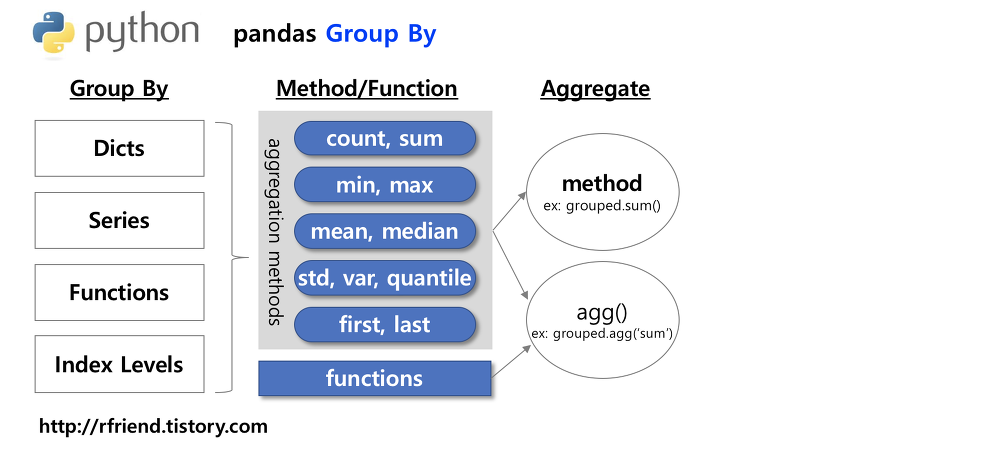

### 4. **GroupBy클래스 객체**

#### 예제1.

In [12]:
df1 = pd.DataFrame({'key1':['A','A','B','B','A'],
                     'key2': ['one','two','one','two','one'],
                     'data1':[1,2,3,4,5],
                     'data2':[10,20,30,40,50]})
df1

,key1,key2,data1,data2
0,A,one,1,10
1,A,two,2,20
2,B,one,3,30
3,B,two,4,40
4,A,one,5,50


#### 4-1. groupby()를 이용한 **데이터 그룹화**

In [13]:
# df1.groupby('key1')
# df1.groupby(df.key1)
gb = df1.groupby(by='key1')
gb

#### 그룹 간 순회하기
-  groupby 메서드에서 반환된 객체는 순회(iteration)를 지원
-  그룹 이름과 그에 따른 데이터 묶음을 튜플로 반환함

In [14]:
for name, group in gb:
    print(f'그룹이름:{name}')
    print(group)

그룹이름:A
  key1 key2  data1  data2
0    A  one      1     10
1    A  two      2     20
4    A  one      5     50
그룹이름:B
  key1 key2  data1  data2
2    B  one      3     30
3    B  two      4     40


In [15]:
pieces = {name:group for name, group in df1.groupby('key2')}
pieces

{'one':   key1 key2  data1  data2
 0    A  one      1     10
 2    B  one      3     30
 4    A  one      5     50,
 'two':   key1 key2  data1  data2
 1    A  two      2     20
 3    B  two      4     40}

In [16]:
pieces['one']

,key1,key2,data1,data2
0,A,one,1,10
2,B,one,3,30
4,A,one,5,50


#### 4-2. GroupBy클래스 객체의 **속성/메서드**

- groups
- ngroups
- indices
- get_group()
- size()
- count()
- sum()

**groups 속성** : 그룹 정보 확인
- 각 그룹의 이름을 키로 갖는 딕셔너리를 반환
    - 딕셔너리 값은 각 그룹에 속하는 인덱스 레이블의 배열
    - Dict {group name -> group labels}

In [18]:
gb = df1.groupby('key2')
gb.groups

{'one': [0, 2, 4], 'two': [1, 3]}

**ngroups 속성**
: group 수 반환

In [19]:
gb.ngroups

2

**get_group() 메서드** : 지정한 그룹 데이터프레임 가져오기

In [20]:
gb.get_group('one')

,key1,key2,data1,data2
0,A,one,1,10
2,B,one,3,30
4,A,one,5,50


In [21]:
gb.get_group('two')

,key1,key2,data1,data2
1,A,two,2,20
3,B,two,4,40


**그룹화된 결과 출력**하는 사용자함수 정의
- 함수명 : print_groups(group_object)
- 각 그룹은 그룹명과 일치하는 값들의 행(row)들로 구성된 데이터프레임을 하나씩 포함하고 있음

In [26]:
def print_groups(groupby_object):
    for name, group in groupby_object:
        print(f'group_name: {name}')
        print(group[:5])
        print()

In [27]:
print_groups(gb)

group_name: one
  key1 key2  data1  data2
0    A  one      1     10
2    B  one      3     30
4    A  one      5     50

group_name: two
  key1 key2  data1  data2
1    A  two      2     20
3    B  two      4     40



**그룹정보 groups를 데이터프레임으로 저장**

In [30]:
gb_df = pd.DataFrame(gb, columns=['key_name', 'data'])
gb_df

,key_name,data
0,one,key1 key2 data1 data2 0 A one 1 ...
1,two,key1 key2 data1 data2 1 A two 2 ...


- 첫번째 그룹 정보

In [31]:
gb_df['key_name']

0    one
1    two
Name: key_name, dtype: object

In [33]:
gb_df.loc[0].values

array(['one',   key1 key2  data1  data2
              0    A  one      1     10
              2    B  one      3     30
              4    A  one      5     50], dtype=object)

- 두번째 그룹 정보

In [34]:
gb_df.loc[1].values

array(['two',   key1 key2  data1  data2
              1    A  two      2     20
              3    B  two      4     40], dtype=object)

**indices 속성** : 그룹별 데이터의 인덱스 정보
- 내부 구현에서 쓰이는 group-to-index mapping
- .groups와 거의 동일하지만, 내부적으로는 더 빠르고 압축적으로 쓰임
- 값의 순서나 구조는 동일하나, group 키가 index label과 관련 없는 경우에는 차이가 있을 수 있음
- groups보다 더 낮은 레벨에서, 고성능 처리를 위해 사용

|항목|groups|indices|
|---|---|---|
|형태|딕셔너리 {key:list} |딕셔너리 {key: np.array}|
|용도|사용자 친화적|내부 연산 최적화용|
|반환 자료|인덱스 리스트(list)|인덱스 배열(np.array)|
|가독성|좋음|낮음|
|사용 예|디버깅, 시각 확인|성능 중심 연산(주로 내부용)|

In [35]:
gb.groups
gb.indices

{'one': [0, 2, 4], 'two': [1, 3]}

{'one': array([0, 2, 4]), 'two': array([1, 3])}

**size() 메소드** : 각 그룹의 크기(행의수) 반환

In [36]:
gb.size()

key2
one    3
two    2
dtype: int64

**count() 메소드** : 각 그룹의 컬럼별 아이템 개수 반환
- 각 그룹에서 Null이 아닌 값의 개수를 계산

In [38]:
gb.count()

,key1,data1,data2
key2,,,
one,3,3,3
two,2,2,2


**sum() 메소드** : 각 그룹의 컬럼별 합계 반환

In [40]:
df1
print_groups(gb)
gb.sum()

,key1,key2,data1,data2
0,A,one,1,10
1,A,two,2,20
2,B,one,3,30
3,B,two,4,40
4,A,one,5,50


group_name: one
  key1 key2  data1  data2
0    A  one      1     10
2    B  one      3     30
4    A  one      5     50

group_name: two
  key1 key2  data1  data2
1    A  two      2     20
3    B  two      4     40



,key1,data1,data2
key2,,,
one,ABA,9,90
two,AB,6,60


In [41]:
# 오류 발생 : 컬럼 중 평균을 계산할 수 없는 컬럼이 있으므로
# gb.mean()

In [42]:
gb['data1'].mean()

key2
one    3.0
two    3.0
Name: data1, dtype: float64

---

### 5. 데이터 **분할(split)**

- 단일 컬럼의 그룹화
- 복수 컬럼의 그룹화
- 인덱스 레벨을 이용한 그룹화
- 결측치를 포함한 컬럼에 대한 그룹화
- 딕셔너리와 Series에서 그룹화
- 함수로 그룹화

#### 5-1. **단일 컬럼**의 그룹화

In [43]:
df1

,key1,key2,data1,data2
0,A,one,1,10
1,A,two,2,20
2,B,one,3,30
3,B,two,4,40
4,A,one,5,50


In [44]:
gb = df1.groupby('key1')
print_groups(gb)

group_name: A
  key1 key2  data1  data2
0    A  one      1     10
1    A  two      2     20
4    A  one      5     50

group_name: B
  key1 key2  data1  data2
2    B  one      3     30
3    B  two      4     40



#### 1) 열이나 열의 일부만 선택하기

**형식**
- GroupBy객체[컬럼명]
- GroupBy객체[[컬럼명]]

In [45]:
gb['data1']

In [46]:
gb[['data1']]

#### 2) 선택한 열에 대한 그룹별 합계

**방법1**
- 그룹객체[컬럼명].sum()
- 그룹객체.sum()[컬럼명]
- 반환값은 시리즈 형식

In [47]:
gb['data1'].sum()
gb.sum()['data1']

key1
A    8
B    7
Name: data1, dtype: int64

key1
A    8
B    7
Name: data1, dtype: int64

In [48]:
type(gb['data1'].sum())

pandas.core.series.Series

**방법2**

- [컬럼명]리스트로 지정한 경우 : 데이터프레임 형식으로 반환
- 그룹객체[[컬럼명]].sum()
- 그룹객체.sum()[[컬럼명]]

In [49]:
gb[['data1']].sum()
gb.sum()[['data1']]

,data1
key1,
A,8
B,7


,data1
key1,
A,8
B,7


In [50]:
type(gb[['data1']].sum())

pandas.core.frame.DataFrame

#### 5-2. **복수 컬럼**의 그룹화

- .groupby( ) 메소드에 그룹명의 리스트를 전달하면 여러 컬럼에 대해 그룹화를 수행

In [52]:
df1.groupby([df1.key1, df1.key2])
gb2 = df1.groupby(['key1', 'key2'])

- 복수 컬럼으로 그룹화한 경우 그룹 정보 : 튜플형태로 반환

In [53]:
gb2.groups

{('A', 'one'): [0, 4], ('A', 'two'): [1], ('B', 'one'): [2], ('B', 'two'): [3]}

- 그룹수 반환 : ngroups

In [54]:
gb2.ngroups

4

- 그룹별 데이터 가져오기 : get_group()

In [55]:
gb2.get_group(('A', 'two'))

,key1,key2,data1,data2
1,A,two,2,20


- 그룹정보 출력 : 앞에서 정의한 print_groups()함수 사용

In [56]:
print_groups(gb2)

group_name: ('A', 'one')
  key1 key2  data1  data2
0    A  one      1     10
4    A  one      5     50

group_name: ('A', 'two')
  key1 key2  data1  data2
1    A  two      2     20

group_name: ('B', 'one')
  key1 key2  data1  data2
2    B  one      3     30

group_name: ('B', 'two')
  key1 key2  data1  data2
3    B  two      4     40



#### 5-3. **인덱스 레벨을 이용**한 그룹화

- 컬럼 대신 인덱스의 값을 사용해 그룹화

**예제2.** 앞의 data 데이터프레임을 계층형 인덱스를 갖도록 데이터 구성 변경

In [57]:
df1

,key1,key2,data1,data2
0,A,one,1,10
1,A,two,2,20
2,B,one,3,30
3,B,two,4,40
4,A,one,5,50


In [65]:
df2 = df1.copy()
df2 = df2.set_index(['key1','key2'])
df2

data1  data2
key1 key2              
A    one       1     10
     two       2     20
B    one       3     30
     two       4     40
A    one       5     50

**레벨0(key1)을 사용해 그룹화**

In [66]:
print_groups(df2.groupby(level=0))

group_name: A
           data1  data2
key1 key2              
A    one       1     10
     two       2     20
     one       5     50

group_name: B
           data1  data2
key1 key2              
B    one       3     30
     two       4     40



**레벨1(key2)을 사용해 그룹화**

In [67]:
print_groups(df2.groupby(level=1))

group_name: one
           data1  data2
key1 key2              
A    one       1     10
B    one       3     30
A    one       5     50

group_name: two
           data1  data2
key1 key2              
A    two       2     20
B    two       4     40



**예제3.**

In [68]:
arrays = [['Falcon', 'Falcon', 'Parrot', 'Parrot'],
          ['Captive', 'Wild', 'Captive', 'Wild']]
index = pd.MultiIndex.from_arrays(arrays, names=('Animal', 'Type'))
df3 = pd.DataFrame({'Max Speed': [390., 350., 30., 20.]},
                   index=index)
df3

Max Speed
Animal Type              
Falcon Captive      390.0
       Wild         350.0
Parrot Captive       30.0
       Wild          20.0

- 인덱스 레벨 기준으로 그룹화하고 집계함수 적용

In [74]:
df3.groupby(level=0).mean()
df3.groupby(level='Type').mean()
df3.groupby(level=[0,1]).mean()
df3.groupby(level=['Animal','Type']).mean()

,Max Speed
Animal,
Falcon,370.0
Parrot,25.0


,Max Speed
Type,
Captive,210.0
Wild,185.0


Max Speed
Animal Type              
Falcon Captive      390.0
       Wild         350.0
Parrot Captive       30.0
       Wild          20.0

Max Speed
Animal Type              
Falcon Captive      390.0
       Wild         350.0
Parrot Captive       30.0
       Wild          20.0

#### 5-4. **결측치를 포함한 컬럼**에 대한 그룹화

**예제4.** 결측치를 포함한 데이터

In [75]:
data = [['a', 12, 12], [None, 12.3, 33.], ['b', 12.3, 123], ['a', 1, 1]]
df4 = pd.DataFrame(data, columns=['X', 'Y', 'Z'])
df4

,X,Y,Z
0,a,12.0,12.0
1,None,12.3,33.0
2,b,12.3,123.0
3,a,1.0,1.0


In [76]:
df4.groupby(by='X').groups

{'a': [0, 3], 'b': [2]}

In [79]:
df4.groupby(by='X').sum()
df4.groupby(by='X', dropna=False).sum()

,Y,Z
X,,
a,13.0,13.0
b,12.3,123.0


,Y,Z
X,,
a,13.0,13.0
b,12.3,123.0
NaN,12.3,33.0


#### 5-5. **딕셔너리와 Series에서** 그룹화

**예제5.**

In [80]:
df5 = pd.DataFrame(np.random.standard_normal((5,5)),
                   columns='a b c d e'.split(),
                   index='Joe Steve Wanda Alice Thomas'.split())
df5.iloc[2:3, [1,2]] = np.nan
df5

,a,b,c,d,e
Joe,0.371448,0.576922,0.460568,-1.504040,0.506988
Steve,0.886169,-1.313572,1.146327,-0.212809,1.220194
Wanda,2.712427,NaN,NaN,0.172216,-1.768803
Alice,0.070390,-0.222311,-0.011632,-0.485789,-0.254074
Thomas,2.438684,-0.725975,-1.577073,1.829459,-0.007256


**딕셔너리를 이용한 그룹화**
- 딕셔너리로 각 컬럼에 대한 그룹 목록 생성

In [81]:
mapping = {'a':'red', 'b':'blue', 'c':'red', 
           'd':'red', 'e':'green', 'f':'blue',}

- 그룹목록을 기준으로 그룹화

In [83]:
gb_col = df5.groupby(mapping, axis='columns')

C:\Users\acorn1\AppData\Local\Temp\ipykernel_17436\134755964.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  gb_col = df5.groupby(mapping, axis='columns')


- 그룹별 합계 집계

In [84]:
gb_col.sum()

,blue,green,red
Joe,0.576922,0.506988,-0.672024
Steve,-1.313572,1.220194,1.819687
Wanda,0.000000,-1.768803,2.884643
Alice,-0.222311,-0.254074,-0.427031
Thomas,-0.725975,-0.007256,2.691070


In [85]:
df5.T.groupby(mapping).sum()

,Joe,Steve,Wanda,Alice,Thomas
blue,0.576922,-1.313572,0.000000,-0.222311,-0.725975
green,0.506988,1.220194,-1.768803,-0.254074,-0.007256
red,-0.672024,1.819687,2.884643,-0.427031,2.691070


**Series를 이용한 그룹화**

In [86]:
map_series = pd.Series(mapping)
map_series

a      red
b     blue
c      red
d      red
e    green
f     blue
dtype: object

In [87]:
df5.groupby(map_series, axis='columns').count()

C:\Users\acorn1\AppData\Local\Temp\ipykernel_17436\479449064.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df5.groupby(map_series, axis='columns').count()


,blue,green,red
Joe,1,1,3
Steve,1,1,3
Wanda,0,1,2
Alice,1,1,3
Thomas,1,1,3


In [88]:
df5.T.groupby(map_series).count()

,Joe,Steve,Wanda,Alice,Thomas
blue,1,1,0,1,1
green,1,1,1,1,1
red,3,3,2,3,3


#### 5-6. **함수**로 그룹화하기

: 함수를 사용하여 그룹화

- 인덱스로 사용되는 **이름의 길이**를 그룹분류 기준으로 사용할 경우

In [89]:
df5

,a,b,c,d,e
Joe,0.371448,0.576922,0.460568,-1.504040,0.506988
Steve,0.886169,-1.313572,1.146327,-0.212809,1.220194
Wanda,2.712427,NaN,NaN,0.172216,-1.768803
Alice,0.070390,-0.222311,-0.011632,-0.485789,-0.254074
Thomas,2.438684,-0.725975,-1.577073,1.829459,-0.007256


In [90]:
print_groups(df5.groupby(len))

group_name: 3
            a         b         c        d         e
Joe  0.371448  0.576922  0.460568 -1.50404  0.506988

group_name: 5
              a         b         c         d         e
Steve  0.886169 -1.313572  1.146327 -0.212809  1.220194
Wanda  2.712427       NaN       NaN  0.172216 -1.768803
Alice  0.070390 -0.222311 -0.011632 -0.485789 -0.254074

group_name: 6
               a         b         c         d         e
Thomas  2.438684 -0.725975 -1.577073  1.829459 -0.007256



In [91]:
df5.groupby(len).sum()

,a,b,c,d,e
3,0.371448,0.576922,0.460568,-1.504040,0.506988
5,3.668987,-1.535883,1.134695,-0.526383,-0.802683
6,2.438684,-0.725975,-1.577073,1.829459,-0.007256


In [93]:
df5.groupby(len).min()

,a,b,c,d,e
3,0.371448,0.576922,0.460568,-1.504040,0.506988
5,0.070390,-1.313572,-0.011632,-0.485789,-1.768803
6,2.438684,-0.725975,-1.577073,1.829459,-0.007256


In [94]:
df5.groupby(len)[['a','c']].mean()

,a,c
3,0.371448,0.460568
5,1.222996,0.567348
6,2.438684,-1.577073


------------------------------------------

## **그룹별 집계/변형/필터**

- 그룹별 집계 : gb.agg() / gb.aggregate() / gb.apply()
- 그룹별 변형 : gb.transform()
- 그룹별 필터 : gb.filter()

### 1. 그룹별 집계①

- 그룹별 **요약/기술을 위해 정의된 메서드들을 사용**하여 연산(플로팅) 수행

|구분|메서드|설명|
|---|---|---|
|요약/기술|데이터 미리보기|head() tail()|
||데이터 갯수|size() count() value_counts()|
||요약|describe()|
||합계, 곱|sum() prod() cumsum() cumprod() |
||기술통계|mean() var() std() median() quantile() min() max() cummin() cummax()|
||순위| first() last() nth() rank()|
|시각화||plot() boxplot() hist()|

**예제6.** iris 데이터셋

In [95]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()
iris.info()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


- 픔종별로 그룹화

In [97]:
i_gb = iris.groupby(iris.species)
print_groups(i_gb)

group_name: setosa
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

group_name: versicolor
    sepal_length  sepal_width  petal_length  petal_width     species
50           7.0          3.2           4.7          1.4  versicolor
51           6.4          3.2           4.5          1.5  versicolor
52           6.9          3.1           4.9          1.5  versicolor
53           5.5          2.3           4.0          1.3  versicolor
54           6.5          2.8           4.6          1.5  versicolor

group_name: virginica
     sepal_length  sepal_width  petal_length  petal_width    species
100           6.3          3.3           6.0          2.5  virginic

- 품종별 그룹 정보 : groups

In [98]:
i_gb.groups

{'setosa': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'versicolor': [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'virginica': [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]}

- 그룹 데이터 가져오기 : get_group()

In [99]:
i_gb.get_group('setosa')[:5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


- 품종별 합계

In [101]:
i_gb.sum()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


- 품종별 평균

In [102]:
i_gb.mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [103]:
pd.pivot_table(data=iris, index='species', aggfunc='mean')

,petal_length,petal_width,sepal_length,sepal_width
species,,,,
setosa,1.462,0.246,5.006,3.428
versicolor,4.260,1.326,5.936,2.770
virginica,5.552,2.026,6.588,2.974


- 품종별 기술통계

In [104]:
i_gb.describe()

sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
species                        ...                                        
setosa            50.0  3.428  ...        1.575  1.9        50.0  0.246   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
species                                        
setosa      0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [105]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [106]:
i_gb.describe().T

species                setosa  versicolor  virginica
sepal_length count  50.000000   50.000000  50.000000
             mean    5.006000    5.936000   6.588000
             std     0.352490    0.516171   0.635880
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.600000   6.225000
             50%     5.000000    5.900000   6.500000
             75%     5.200000    6.300000   6.900000
             max     5.800000    7.000000   7.900000
sepal_width  count  50.000000   50.000000  50.000000
             mean    3.428000    2.770000   2.974000
             std     0.379064    0.313798   0.322497
             min     2.300000    2.000000   2.200000
             25%     3.200000    2.525000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.675000    3.000000   3.175000
             max     4.400000    3.400000   3.800000
petal_length count  50.000000   50.000000  50.000000
             mean    1.462000    4.260000   5.552000
             std     0.173664    0.469911   0.551895
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.350000   5.550000
             75%     1.575000    4.600000   5.875000
             max     1.900000    5.100000   6.900000
petal_width  count  50.000000   50.000000  50.000000
             mean    0.246000    1.326000   2.026000
             std     0.105386    0.197753   0.274650
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     0.600000    1.800000   2.500000

- 품종별 분포 시각화

setosa             Axes(0.1,0.559091;0.363636x0.340909)
versicolor    Axes(0.536364,0.559091;0.363636x0.340909)
virginica              Axes(0.1,0.15;0.363636x0.340909)
dtype: object

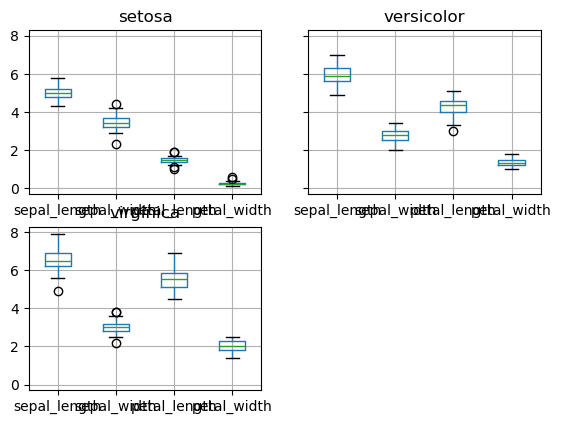

In [107]:
i_gb.boxplot()

species
setosa        [[Axes(0.125,0.545217;0.336957x0.334783), Axes...
versicolor    [[Axes(0.125,0.545217;0.336957x0.334783), Axes...
virginica     [[Axes(0.125,0.545217;0.336957x0.334783), Axes...
dtype: object

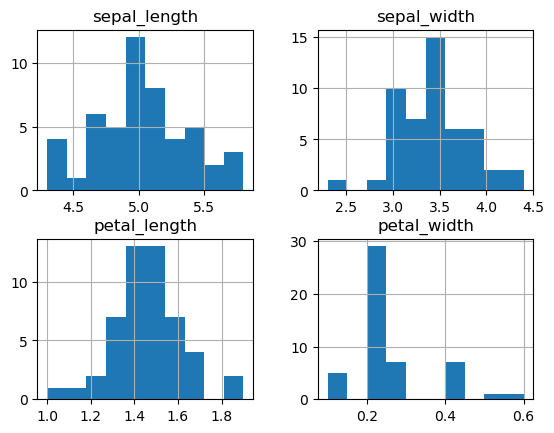

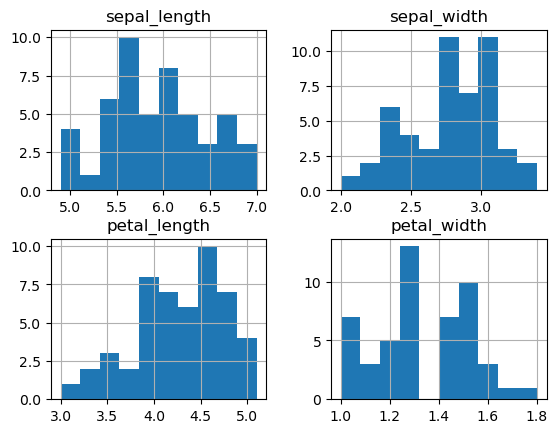

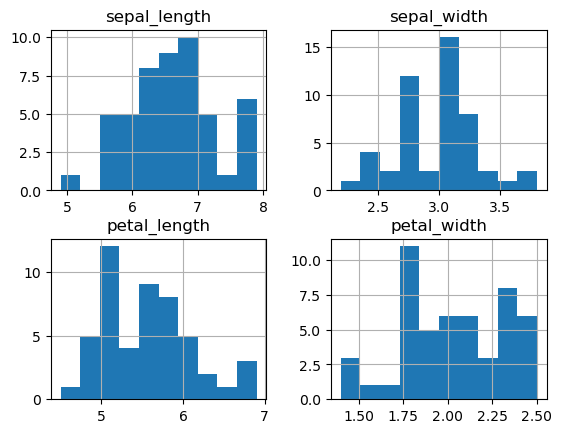

In [108]:
i_gb.hist()

- [] 연산자를 사용해 특정 컬럼에 대한 집계 연산 수행

species
setosa        Axes(0.125,0.11;0.775x0.77)
versicolor    Axes(0.125,0.11;0.775x0.77)
virginica     Axes(0.125,0.11;0.775x0.77)
Name: sepal_length, dtype: object

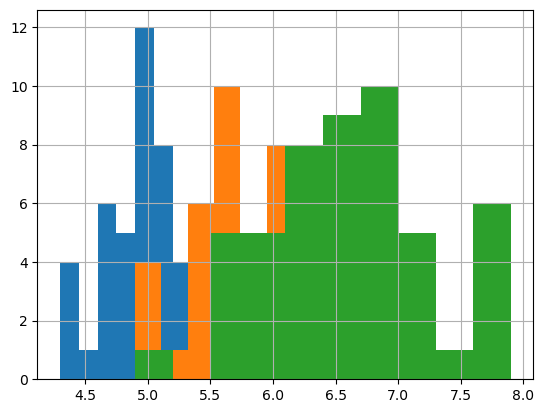

In [113]:
i_gb['sepal_length'].hist()

species
setosa        [[Axes(0.125,0.11;0.336957x0.77), Axes(0.56304...
versicolor    [[Axes(0.125,0.11;0.336957x0.77), Axes(0.56304...
virginica     [[Axes(0.125,0.11;0.336957x0.77), Axes(0.56304...
Name: (sepal_length, petal_length), dtype: object

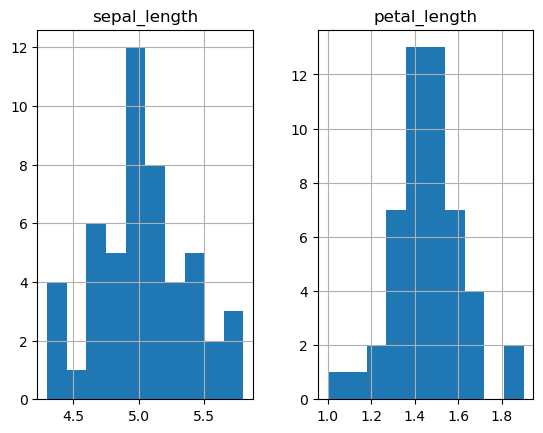

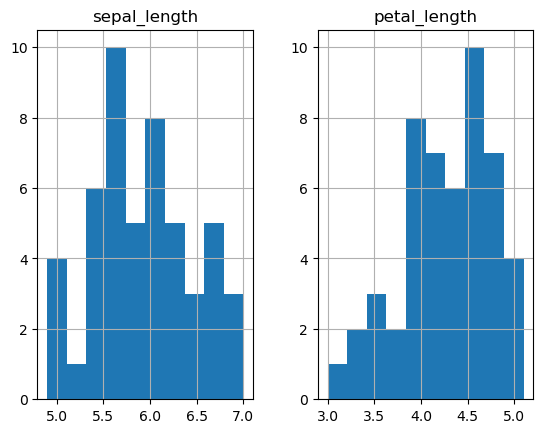

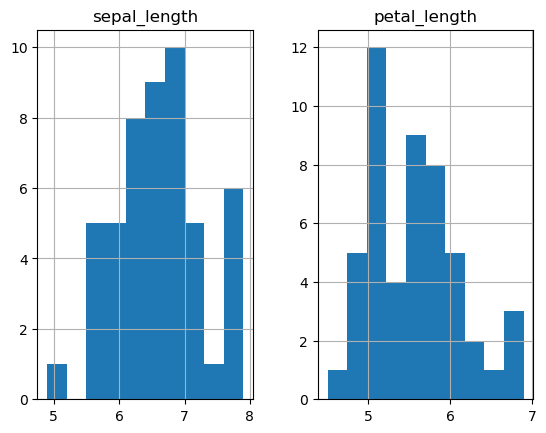

In [112]:
i_gb[['sepal_length', 'petal_length']].hist()

In [114]:
i_gb['petal_length'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,50.0,1.462,0.173664,1.0,1.4,1.50,1.575,1.9
versicolor,50.0,4.260,0.469911,3.0,4.0,4.35,4.600,5.1
virginica,50.0,5.552,0.551895,4.5,5.1,5.55,5.875,6.9


### 2. 그룹별 집계② 

- agg(), aggregate()
- apply()

#### 2-1. `agg()` 또는 `aggregate()` 함수

**GroupBy.agg**(func, *args, **kwargs)
- func : 함수이름
    - 내장함수는 np.sum 또는 'sum'과 같은 형식으로 지정
    - 사용자정의함수는 함수이름 그대로
- *args : 함수의 매개변수들
- **kwargs : 함수에 들어가는 키워드 인수들

- 각 그룹에 대해 집계함수를 모두 적용
- 적용할 함수의 참조를 파라미터로 전달
- 데이터프레임의 경우 그룹 안의 각 컬럼 데이터에 적용됨
- **숫자 타입의 스칼라만 리턴하는 함수를 적용**하는 apply()의 특수한 경우
    - 참고. 스칼라(scalar)
        - 하나의 수치(數値)만으로 완전히 표시되는 양
        - 방향의 구별이 없는 물리적 수량
        - 질량·에너지·밀도(密度)·전기량(電氣量) 따위

① agg()에 내장 함수 적용

In [115]:
i_gb.agg('sum')

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


② agg()에 사용자정의 함수 적용

예. 품종(그룹)별 최대값과 최소값의 비율 계산
- 각 컬럼의 최대값과 최소값의 비율 계산하는 함수 ratio() 작성

In [118]:
def ratio(x):
    return x.max() / x.min()

In [119]:
i_gb.agg(ratio)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,1.348837,1.913043,1.900000,6.000000
versicolor,1.428571,1.700000,1.700000,1.800000
virginica,1.612245,1.727273,1.533333,1.785714


#### 2-2. `apply()` 함수

GroupBy.apply(func, *args, **kwargs)

- func : 함수이름
    - 내장함수는 np.sum 또는 'sum'으로 지정, 사용자정의함수는 함수이름 그대로
- *args : 함수의 매개변수들
- **kwargs : 함수에 들어가는 키워드 인수들

예. Top3 산출함수 정의
- petal_length 기준으로 Top3 항목 선택
- 함수의 반환값이 데이터 집합형태

In [121]:
def top3_petal_length(df):
    return df.sort_values(by='petal_length', ascending=False)[:3]

In [122]:
top3_petal_length(iris)

,sepal_length,sepal_width,petal_length,petal_width,species
118,7.7,2.6,6.9,2.3,virginica
117,7.7,3.8,6.7,2.2,virginica
122,7.7,2.8,6.7,2.0,virginica


- 품종별로 petal_length 기준의 Top3

In [125]:
i_gb.apply(top3_petal_length, include_groups=False)

sepal_length  sepal_width  petal_length  petal_width
species                                                             
setosa     44            5.1          3.8           1.9          0.4
           24            4.8          3.4           1.9          0.2
           18            5.7          3.8           1.7          0.3
versicolor 83            6.0          2.7           5.1          1.6
           77            6.7          3.0           5.0          1.7
           52            6.9          3.1           4.9          1.5
virginica  118           7.7          2.6           6.9          2.3
           117           7.7          3.8           6.7          2.2
           122           7.7          2.8           6.7          2.0

주의.
- agg( )는 반환값이 수치스칼라인 경우만 사용 가능
- apply()는 반환값이 수치 집합인 경우 적용 가능

예. 품종별로 최대값과 최소값 비중
- 앞에서 정의한 ratio 함수를 apply를 이용하여 적용

In [126]:
i_gb.apply(ratio)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,1.348837,1.913043,1.900000,6.000000
versicolor,1.428571,1.700000,1.700000,1.800000
virginica,1.612245,1.727273,1.533333,1.785714


예. 수치형자료를 대,중,소 3범주를 갖는 범주형으로 변환

- qcut()함수 응용

In [127]:
def q3cut(s):
    return pd.qcut(s, 3, labels=['small','medium','large']).astype(str)

In [129]:
q3cut([1,3,4,-1,5,8,2,7,0])

array(['small', 'medium', 'medium', 'small', 'large', 'large', 'medium',
       'large', 'small'], dtype='<U6')

- 품종별로 petal_length를 대,중,소 3범주로 변환

In [130]:
iris.groupby('species').petal_length.apply(q3cut)

species       
setosa     0       small
           1       small
           2       small
           3      medium
           4       small
                   ...  
virginica  145     small
           146     small
           147     small
           148    medium
           149     small
Name: petal_length, Length: 150, dtype: object

- 품종별로 petal_length를 대,중,소 3범주로 변환된 값을 petal_length_class변수로 추가

In [131]:
iris['petal_length_class'] = iris.groupby('species').petal_length.apply(q3cut).values
iris.head()
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,petal_length_class
0,5.1,3.5,1.4,0.2,setosa,small
1,4.9,3.0,1.4,0.2,setosa,small
2,4.7,3.2,1.3,0.2,setosa,small
3,4.6,3.1,1.5,0.2,setosa,medium
4,5.0,3.6,1.4,0.2,setosa,small


,sepal_length,sepal_width,petal_length,petal_width,species,petal_length_class
145,6.7,3.0,5.2,2.3,virginica,small
146,6.3,2.5,5.0,1.9,virginica,small
147,6.5,3.0,5.2,2.0,virginica,small
148,6.2,3.4,5.4,2.3,virginica,medium
149,5.9,3.0,5.1,1.8,virginica,small


----------------------------------------

### 3. 그룹별 변형: transform()

**데이터 변형의 일반적인 과정**

: transform() 메소드는 데이터프레임의 모든 값에 지정한 함수를 적용하며, 다음의 특성을 갖는 새 데이터프레임을 반환한다

- 모든 그룹의 인덱스가 합쳐진 인덱스를 갖는다
- row의 개수는 모든 그룹의 row 개수의 총합과 같다
- 그룹화 대상이 아닌 컬럼도 함수가 성공적으로 적용된다면 결과에 포함되며, 그렇지 않은 컬럼은 삭제될 수 있다

#### **변형 사례1.**  모든 그룹의 데이터값 변경

**예제7.**

In [132]:
trans_data = pd.DataFrame({'Label' : ['A','C','B','A','C'],
                           'Values': [0, 1, 2, 3, 4],
                           'Values2' : [5, 6, 7, 8, 9],
                           'Other': ['foo','bar','baz','fiz','buz']},
                          index=list('VWXYZ'))
trans_data

,Label,Values,Values2,Other
V,A,0,5,foo
W,C,1,6,bar
X,B,2,7,baz
Y,A,3,8,fiz
Z,C,4,9,buz


- Label 컬럼으로 그룹화 및 그룹 정보 확인

In [133]:
# trans_data.groupby(by='Label')
t_gb = trans_data.groupby('Label')
# trans_data.groupby(trans_data['Label'])
print_groups(t_gb)

group_name: A
  Label  Values  Values2 Other
V     A       0        5   foo
Y     A       3        8   fiz

group_name: B
  Label  Values  Values2 Other
X     B       2        7   baz

group_name: C
  Label  Values  Values2 Other
W     C       1        6   bar
Z     C       4        9   buz



In [134]:
t_gb.groups

{'A': ['V', 'Y'], 'B': ['X'], 'C': ['W', 'Z']}

- 모든 값에 10을 더하는 함수를 적용해 데이터프레임 **변형**

In [136]:
trans_data[['Values','Values2']]
t_gb[['Values','Values2']].transform(lambda x:x+10)

,Values,Values2
V,0,5
W,1,6
X,2,7
Y,3,8
Z,4,9


,Values,Values2
V,10,15
W,11,16
X,12,17
Y,13,18
Z,14,19


#### **변형사례2.** 그룹의 평균으로 결측값 채우기

**예제8.**

In [137]:
trans_data2 = pd.DataFrame({'Label' : list('ABABAB'),
                            'Values' : [10, 20, 11, np.nan, 12, 22]})
trans_data2

,Label,Values
0,A,10.0
1,B,20.0
2,A,11.0
3,B,NaN
4,A,12.0
5,B,22.0


- 그룹화 및 그룹 정보 확인

In [141]:
t_gb2 = trans_data2.groupby('Label')
t_gb2.groups
print_groups(t_gb2)

{'A': [0, 2, 4], 'B': [1, 3, 5]}

group_name: A
  Label  Values
0     A    10.0
2     A    11.0
4     A    12.0

group_name: B
  Label  Values
1     B    20.0
3     B     NaN
5     B    22.0



- 각 그룹의 평균 계산

In [142]:
t_gb2.mean()

,Values
Label,
A,11.0
B,21.0


- **결측치(Nan) 채우기** : 그룹별 평균으로 채우기

In [143]:
t_gb2.transform(lambda x:x.fillna(x.mean()))

,Values
0,10.0
1,20.0
2,11.0
3,21.0
4,12.0
5,22.0


### 4. 그룹 필터링 : filter()

- 데이터그룹을 조건에 따라 선택적으로 선택
- 조건이 만족하지 않는 경우 삭제

**예제9.**

In [144]:
df = pd.DataFrame({'Label' : list('AABCCC'),
                   'Values' : [1, 2, 3, 4, np.nan, 8]})
df

,Label,Values
0,A,1.0
1,A,2.0
2,B,3.0
3,C,4.0
4,C,NaN
5,C,8.0


#### **필터링 예1.** 아이템의 개수가 지정한 최소한의 수를 넘는 그룹만 선택

In [151]:
df.groupby('Label').filter(lambda x:x.Values.count() > 1)

,Label,Values
0,A,1.0
1,A,2.0
3,C,4.0
4,C,NaN
5,C,8.0


#### **필터링 예2.** NaN이 없는 그룹만 선택
- NaN이 하나라도 존재하는 그룹 제외

In [152]:
df.groupby('Label').filter(lambda x:x.Values.isnull().sum() == 0)

,Label,Values
0,A,1.0
1,A,2.0
2,B,3.0


In [154]:
df.groupby('Label').apply(lambda x:x.Values.isnull().sum(),include_groups=False)

Label
A    0
B    0
C    1
dtype: int64

#### **필터링 예3.** 전체 데이터셋 평균과의 차이가 2.0이 넘는 그룹 평균을 가진 그룹만 필터링

In [155]:
df.groupby('Label').mean()

,Values
Label,
A,1.5
B,3.0
C,6.0


In [160]:
# 전체 평균
mean = df.Values.mean()

In [159]:
# 그룹간 평균
g_mean = df.groupby('Label').mean().mean()
g_mean

Values    3.5
dtype: float64

In [161]:
df.groupby('Label').filter(lambda x:x.Values.mean() - mean > 2.0)

,Label,Values
3,C,4.0
4,C,NaN
5,C,8.0


---

###  정리

- 1단계 : 그룹으로 분할(split) - df.groupby([ ])

- 2단계 :  그룹별 연산(내장, 사용자함수), 변환, 추출 적용

- 3단계 : 그룹별 결과 combine

- 그룹화.내장함수
- 그룹화.agg(함수) : 함수의 반환값이 스칼라
- 그룹화.apply(함수) : 함수의 반환값이 집합
- 그룹화.filter(함수) : 데이터추출
- 그룹화.transform(함수) : 데이터변환

----------------------------------